# 6.4 Regression Analysis for Machine Learning

This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs creatd are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import Data
df = pd.read_csv(r"C:\Users\miche\DA_Obesity and COVID19\Achievement 06 Notes_Tasks_Data\Obesity Rates and Demographics.csv")

### 2. Data Cleaning

In [4]:
df.head()

,Year,State,Obesity Rate % Overall,Obese % Age 18-24,Obese % Age 25-34,Obese % Age 35-44,Obese % Age 45-54,Obese % Age 55-64,Obese % Age 65+,Obese % Education Less than HS,...,Obese % Income $25-34k,Obese % Income $35-49k,Obese % Income $50k+,Obese % Race White,Obese % Race Black,Obese % Race Hispanic,Obese % Female,Obese % Male,Latitude,Longitude
0,2011,Alabama,32.00,16.30,35.20,35.50,38.00,36.4,27.10,33.60,...,35.80,32.30,30.90,29.80,40.10,28.60,31.80,32.30,32.840571,-86.631861
1,2012,Alabama,33.00,23.90,31.30,34.30,39.70,40.2,26.90,35.20,...,29.00,34.50,31.30,30.10,44.10,24.10,34.10,31.80,32.840571,-86.631861
2,2013,Alabama,32.40,19.00,30.40,36.70,40.00,37.1,28.40,33.80,...,33.10,31.10,30.50,29.60,41.30,28.20,34.00,30.90,32.840571,-86.631861
3,2014,Alabama,33.50,20.40,31.70,40.90,39.90,37.4,28.90,34.80,...,35.40,35.50,31.50,31.40,41.90,22.90,32.90,34.10,32.840571,-86.631861
4,2015,Alabama,35.63,25.06,35.18,41.05,40.58,40.3,30.15,38.44,...,38.81,36.48,33.42,32.33,46.41,31.41,36.38,34.87,32.840571,-86.631861


In [5]:
df.columns

Index(['Year', 'State', 'Obesity Rate % Overall', 'Obese % Age 18-24',
       'Obese % Age 25-34', 'Obese % Age 35-44', 'Obese % Age 45-54',
       'Obese % Age 55-64', 'Obese % Age 65+',
       'Obese % Education Less than HS', 'Obese % Education HS or GED',
       'Obese % Education Some post HS', 'Obese % Education College Grad',
       'Obese % Income Under $15k', 'Obese % Income $15-24k',
       'Obese % Income $25-34k', 'Obese % Income $35-49k',
       'Obese % Income $50k+', 'Obese % Race White', 'Obese % Race Black',
       'Obese % Race Hispanic', 'Obese % Female', 'Obese % Male', 'Latitude',
       'Longitude'],
      dtype='object')

In [6]:
df.shape

(559, 25)

#### Missing Values

In [7]:
# Check for missing values

df.isnull().sum()

Year                                0
State                               0
Obesity Rate % Overall              0
Obese % Age 18-24                   6
Obese % Age 25-34                   0
Obese % Age 35-44                   0
Obese % Age 45-54                   0
Obese % Age 55-64                   0
Obese % Age 65+                     0
Obese % Education Less than HS      0
Obese % Education HS or GED         0
Obese % Education Some post HS      0
Obese % Education College Grad      0
Obese % Income Under $15k           0
Obese % Income $15-24k              0
Obese % Income $25-34k              0
Obese % Income $35-49k              0
Obese % Income $50k+                0
Obese % Race White                  0
Obese % Race Black                103
Obese % Race Hispanic              28
Obese % Female                      0
Obese % Male                        0
Latitude                            0
Longitude                           0
dtype: int64

Handling Missing Data: In this case, we will do nothing with the missing data. Supplementary data sources are limited in providing trustworthy data. The missing values account for over 15% of the column entries, so it will not be removed. Because the missing data accounts for obesity rates accoss various locations, replacing the missing with the median or mean should not apply.

#### Duplicates Check

In [8]:
dups = df.duplicated()
dups.shape
# No duplicates

(559,)

#### Extreme Values Check

C:\Users\miche\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Obesity Rate % Overall', ylabel='Density'>

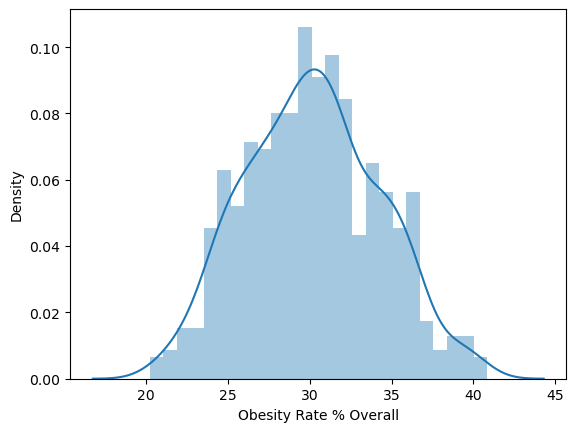

In [9]:
sns.distplot(df['Obesity Rate % Overall'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but attempts without doing so first.

In [10]:
df['Obesity Rate % Overall'].mean()

30.163148479427544

In [11]:
df['Obesity Rate % Overall'].median()

30.06

In [12]:
df['Obesity Rate % Overall'].max()

40.84

### 3. Data Prep for Regression Analysis

In [ ]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Obesity Rate % Overall', y='Obese % Age 65+', style='o')  
plt.title('Obesity % Age vs Obesity % Overall')  
plt.xlabel('Overall')  
plt.ylabel('Age 65+')  
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Obesity Rate % Overall'].values.reshape(-1,1)
y = df['Obese % Age 65+'].values.reshape(-1,1)

In [33]:
X

array([[32.  ],
       [33.  ],
       [32.4 ],
       [33.5 ],
       [35.63],
       [35.7 ],
       [36.33],
       [36.24],
       [36.12],
       [39.01],
       [39.86],
       [27.4 ],
       [25.7 ],
       [28.4 ],
       [29.7 ],
       [29.83],
       [31.39],
       [34.18],
       [29.53],
       [30.5 ],
       [31.87],
       [33.47],
       [25.1 ],
       [26.  ],
       [26.8 ],
       [28.9 ],
       [28.42],
       [29.01],
       [29.46],
       [29.49],
       [31.4 ],
       [30.89],
       [31.31],
       [30.9 ],
       [34.5 ],
       [34.6 ],
       [35.9 ],
       [34.49],
       [35.68],
       [35.04],
       [37.12],
       [37.41],
       [36.43],
       [38.65],
       [23.8 ],
       [25.  ],
       [24.1 ],
       [24.7 ],
       [24.18],
       [25.  ],
       [25.12],
       [25.83],
       [26.15],
       [30.25],
       [27.58],
       [20.7 ],
       [20.5 ],
       [21.3 ],
       [21.3 ],
       [20.2 ],
       [22.27],
       [22.64],
       [

In [34]:
y

array([[27.1 ],
       [26.9 ],
       [28.4 ],
       [28.9 ],
       [30.15],
       [29.58],
       [29.04],
       [31.75],
       [31.3 ],
       [34.93],
       [30.88],
       [29.3 ],
       [26.8 ],
       [30.4 ],
       [29.6 ],
       [34.74],
       [35.33],
       [34.82],
       [27.21],
       [30.22],
       [32.74],
       [31.76],
       [22.6 ],
       [22.5 ],
       [23.2 ],
       [24.7 ],
       [24.24],
       [25.89],
       [25.47],
       [26.09],
       [25.71],
       [25.8 ],
       [28.28],
       [26.1 ],
       [25.9 ],
       [26.4 ],
       [29.2 ],
       [29.84],
       [27.64],
       [30.55],
       [30.07],
       [32.43],
       [30.47],
       [33.44],
       [21.2 ],
       [21.2 ],
       [22.  ],
       [24.1 ],
       [22.77],
       [23.53],
       [24.24],
       [24.19],
       [23.3 ],
       [26.12],
       [23.9 ],
       [20.2 ],
       [19.6 ],
       [18.6 ],
       [20.5 ],
       [20.  ],
       [21.  ],
       [22.43],
       [

### 4. Regression Analysis

In [35]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

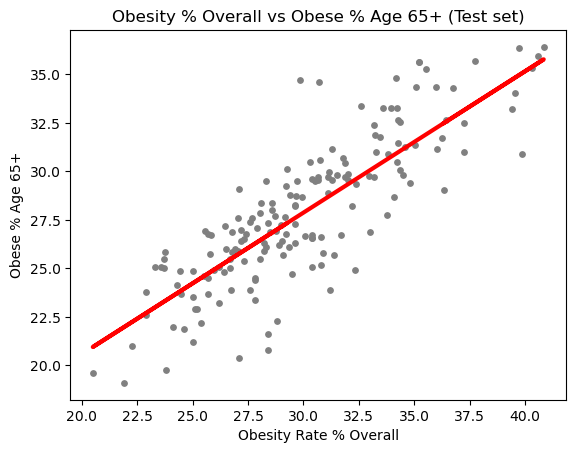

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Obesity % Overall vs Obese % Age 65+ (Test set)')
plot_test.xlabel('Obesity Rate % Overall')
plot_test.ylabel('Obese % Age 65+')
plot_test.show()

In [40]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [41]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.72899719]]
Mean squared error:  4.34246508744196
R2 score:  0.697102410296782


In [42]:
y_predicted

array([[27.29400166],
       [26.34630531],
       [23.86771487],
       [26.56500447],
       [22.99291825],
       [29.11649463],
       [25.74123765],
       [27.65850025],
       [24.61129201],
       [26.78370363],
       [26.56500447],
       [28.36562753],
       [25.61730813],
       [31.15039678],
       [25.54440841],
       [27.51270082],
       [35.40774036],
       [34.73706295],
       [25.10701009],
       [28.97069519],
       [28.80302584],
       [29.47370325],
       [25.98180672],
       [34.96305208],
       [32.22931262],
       [28.67909632],
       [25.10701009],
       [30.64738873],
       [27.28671169],
       [28.16879828],
       [29.56847289],
       [35.06511169],
       [26.83473343],
       [25.47150869],
       [30.04961103],
       [29.24771412],
       [27.58560053],
       [30.62551881],
       [23.19703746],
       [23.33554693],
       [28.72283615],
       [26.20050588],
       [29.18939435],
       [31.39825583],
       [34.82454261],
       [28

In [43]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,26.80,27.294002
1,27.10,26.346305
2,23.70,23.867715
3,26.33,26.565004
4,25.10,22.992918
5,26.70,29.116495
6,25.91,25.741238
7,29.50,27.658500
8,24.59,24.611292
9,26.90,26.783704


In [44]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [45]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.72899719]]
Mean squared error:  4.949453904968914
R2 score:  0.6379014010429964


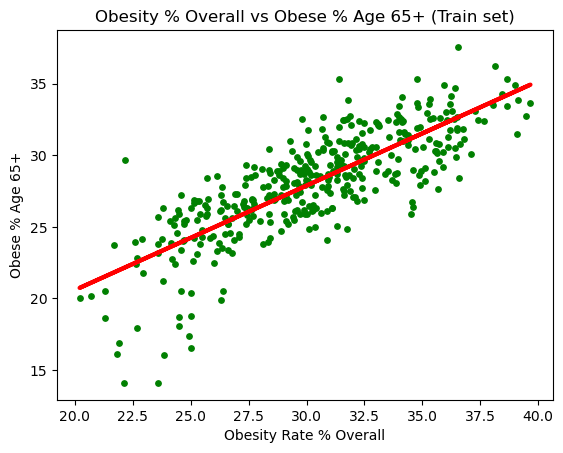

In [47]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Obesity % Overall vs Obese % Age 65+ (Train set)')
plot_test.xlabel('Obesity Rate % Overall')
plot_test.ylabel('Obese % Age 65+')
plot_test.show()